# Plotting Phase Accumulation and Phase Difference between Waveforms in Time and Frequency Domains

Simona Miller, LIGO SURF 2018 
(Last updated: July 9, 2018)

In [71]:
from pycbc import catalog
from pycbc.waveform import get_td_waveform, get_fd_waveform
from pycbc.waveform import td_approximants, fd_approximants
from pycbc.fft import fft

import numpy as np
import scipy as sp
import pylab

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

## Generating Waveform for 10 solar mass BBH

In [72]:
# Generating waveforms for 10 solar mass BBH merger
hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=10,
                         mass2=10,
                         delta_t=1.0/4096,
                         f_lower=30)

In [73]:
print hp
print hc

[ -3.99123067e-20  -3.96242940e-20  -3.92523259e-20 ...,   0.00000000e+00
   0.00000000e+00   0.00000000e+00]
[ -5.36648870e-21  -7.19730803e-21  -9.01306425e-21 ...,   0.00000000e+00
   0.00000000e+00   0.00000000e+00]


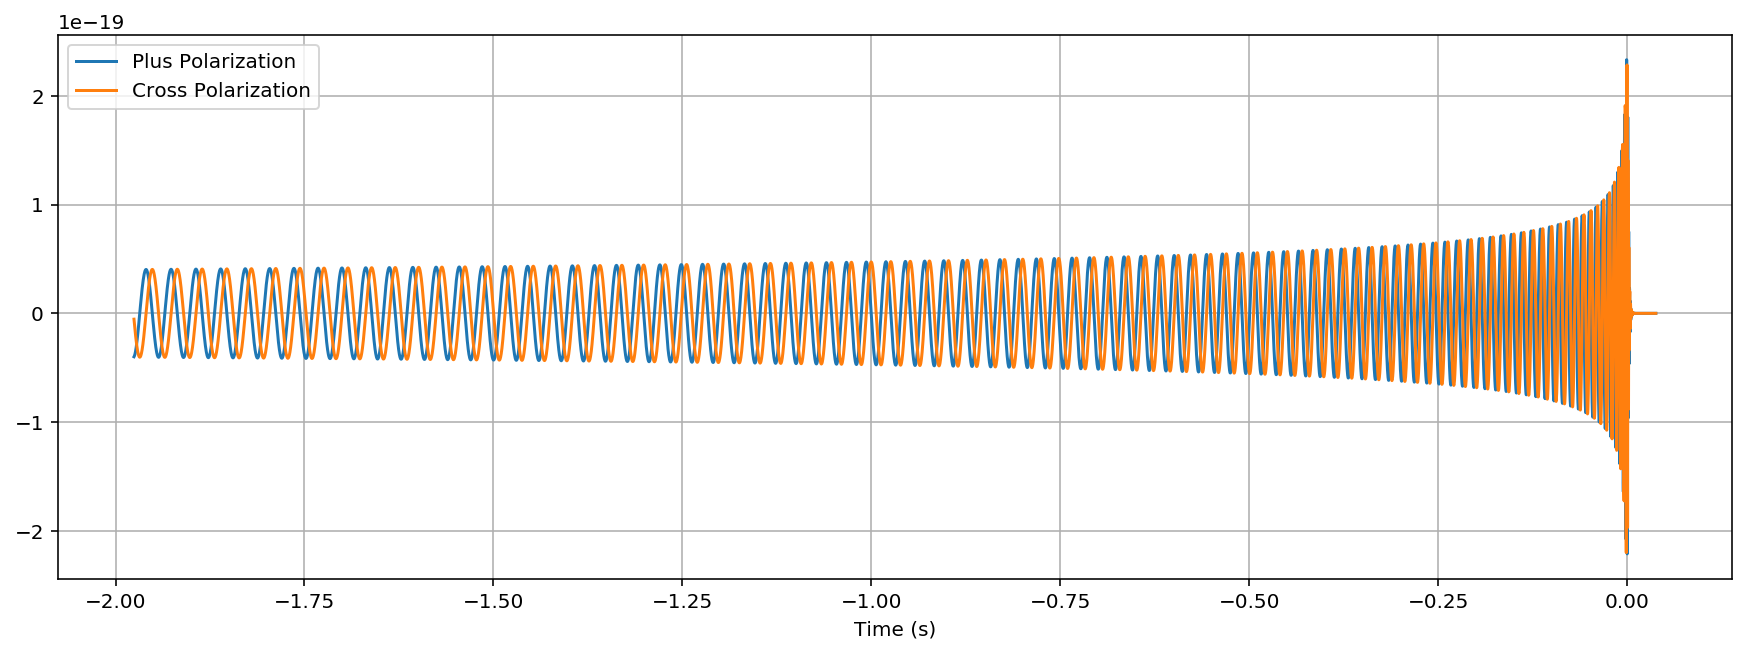

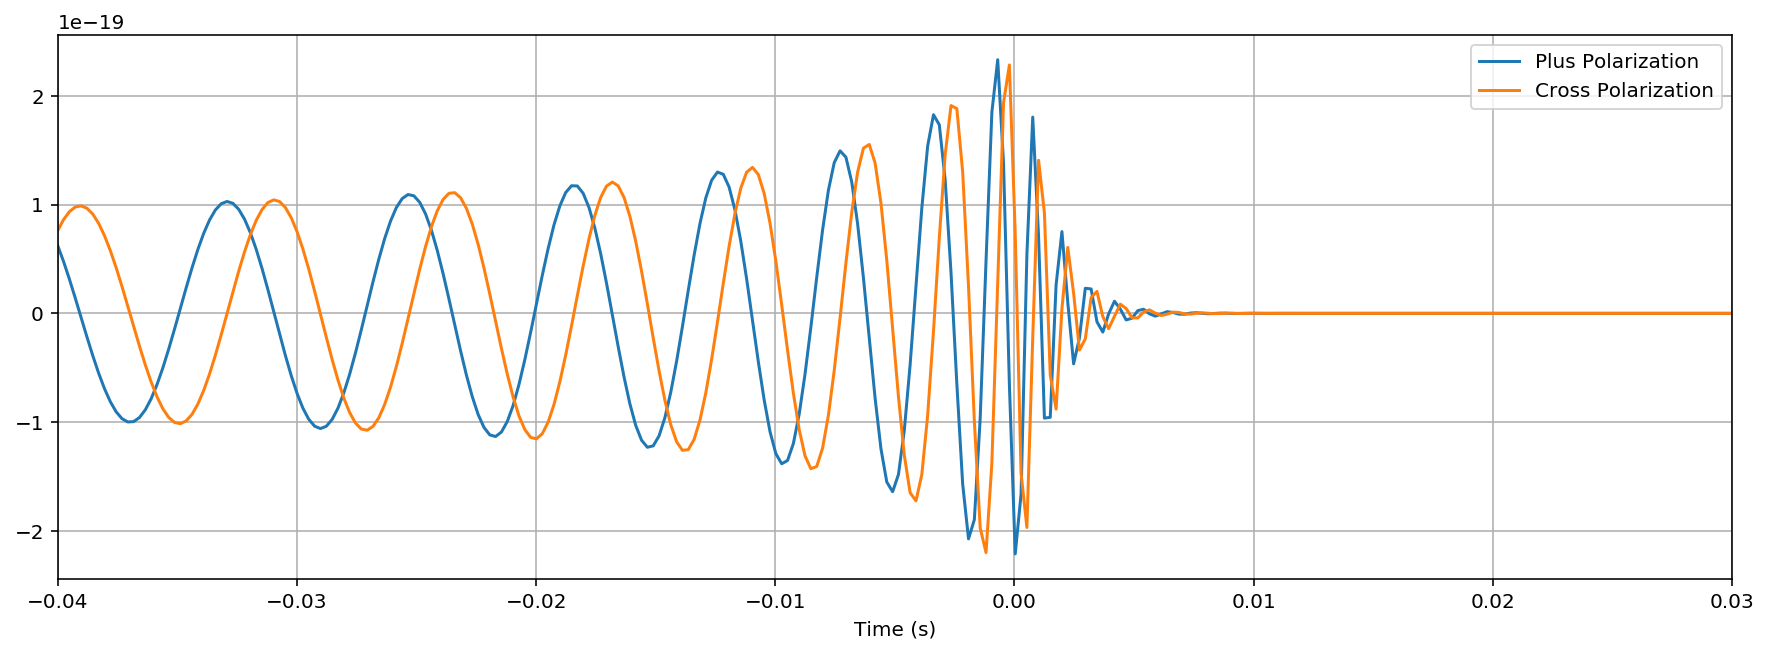

In [74]:
# Plotting time series 
plt.figure(figsize=(15,5))
plt.plot(hp.sample_times, hp, label='Plus Polarization')
plt.plot(hp.sample_times, hc, label='Cross Polarization')
plt.xlabel('Time (s)')
plt.legend()
plt.grid()

# Zooming in on merger
plt.figure(figsize=(15,5))
plt.plot(hp.sample_times, hp, label='Plus Polarization')
plt.plot(hp.sample_times, hc, label='Cross Polarization')
plt.xlabel('Time (s)')
plt.xlim(-0.04, 0.03)
plt.legend()
plt.grid()

Transforming to frequency domain ... 

In [75]:
hp_f = hp.to_frequencyseries()
hc_f = hc.to_frequencyseries()

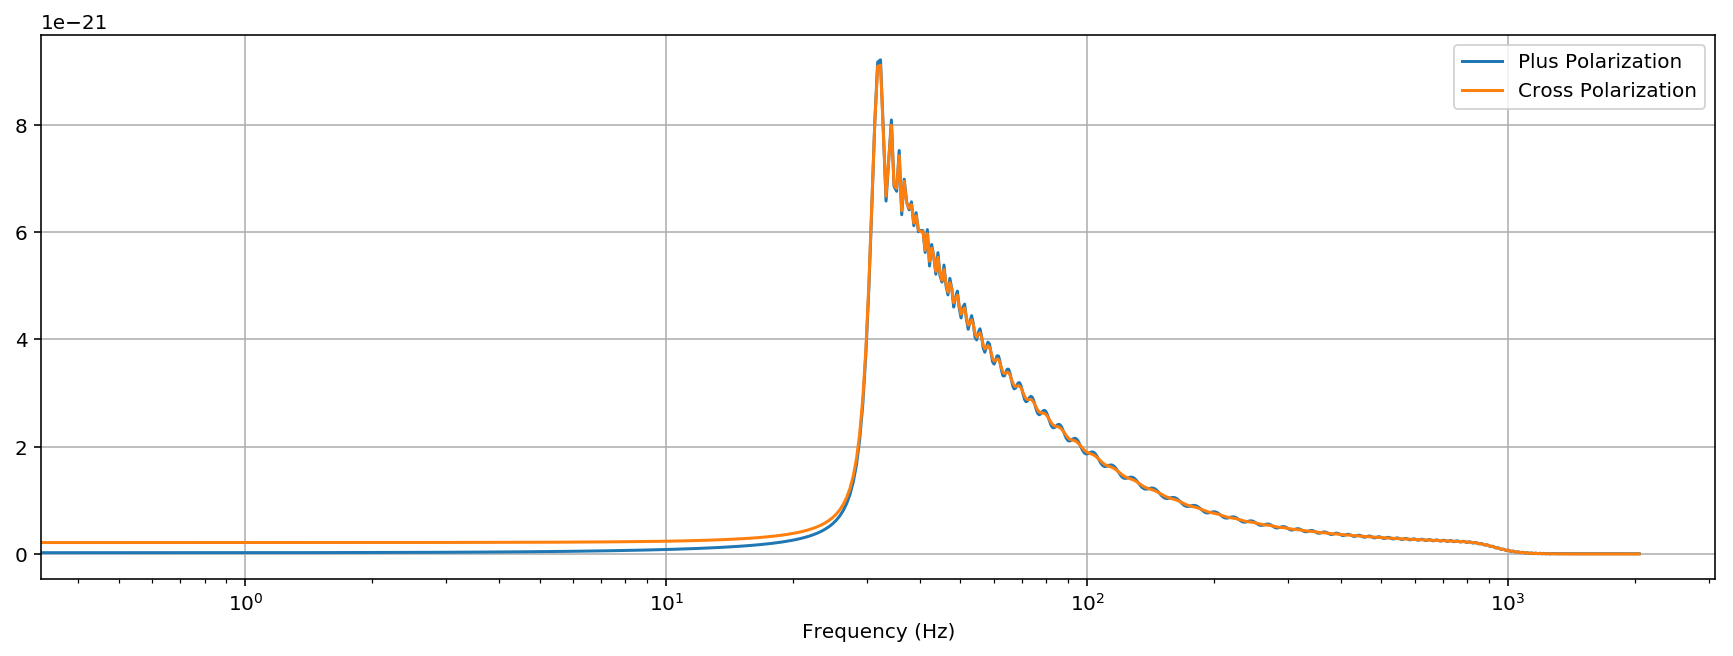

In [76]:
# Plotting frequency series
plt.figure(figsize=(15,5))
plt.semilogx(hp_f.sample_frequencies, np.abs(hp_f), label='Plus Polarization')
plt.semilogx(hp_f.sample_frequencies, np.abs(hc_f), label='Cross Polarization')
plt.xlabel('Frequency (Hz)')
plt.legend()
plt.grid()

## Generating Waveform for 10.1 solar mass BBH

In [77]:
# Generating waveforms for 10.1 solar mass BBH merger
hp2, hc2 = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=10.1,
                         mass2=10.1,
                         delta_t=1.0/4096,
                         f_lower=30)

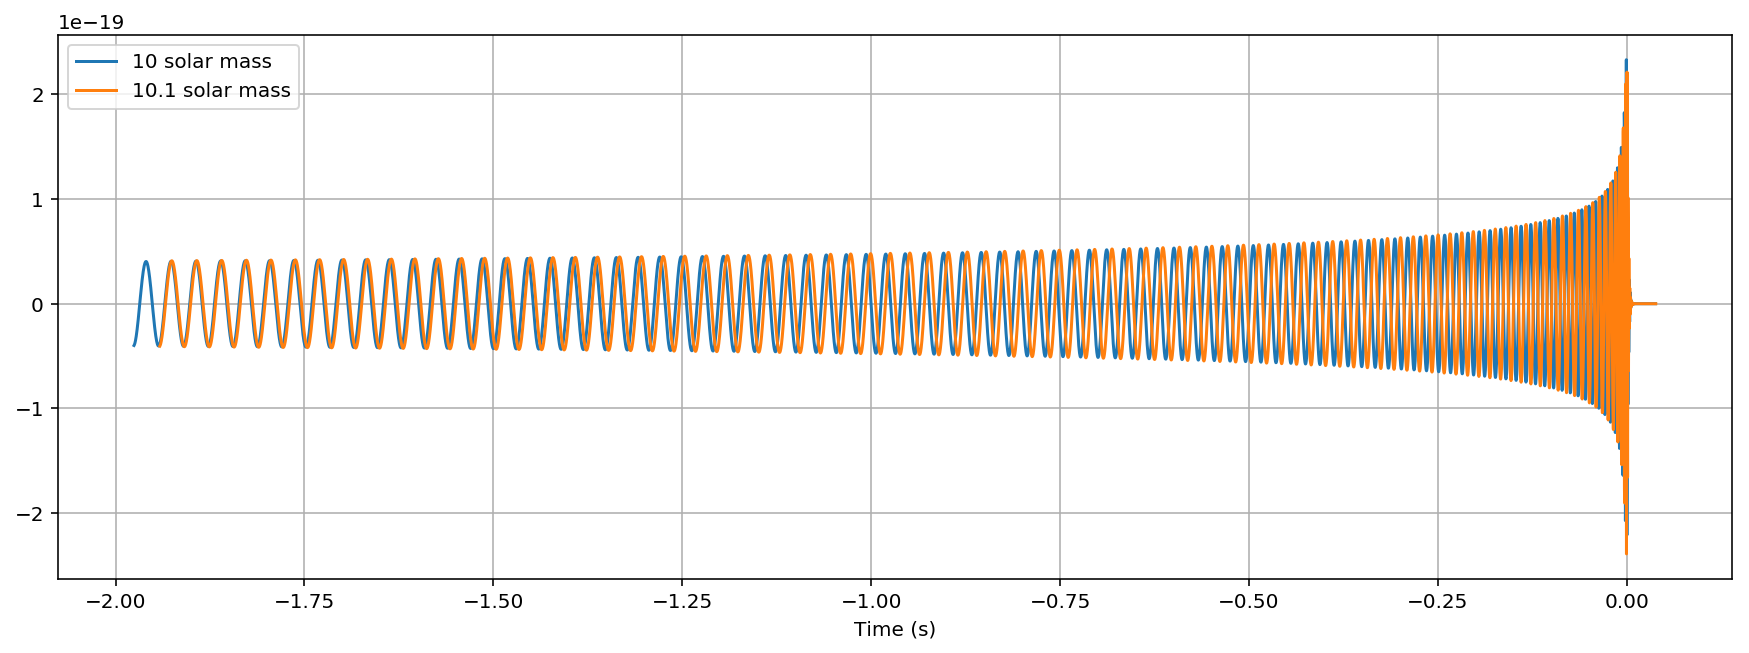

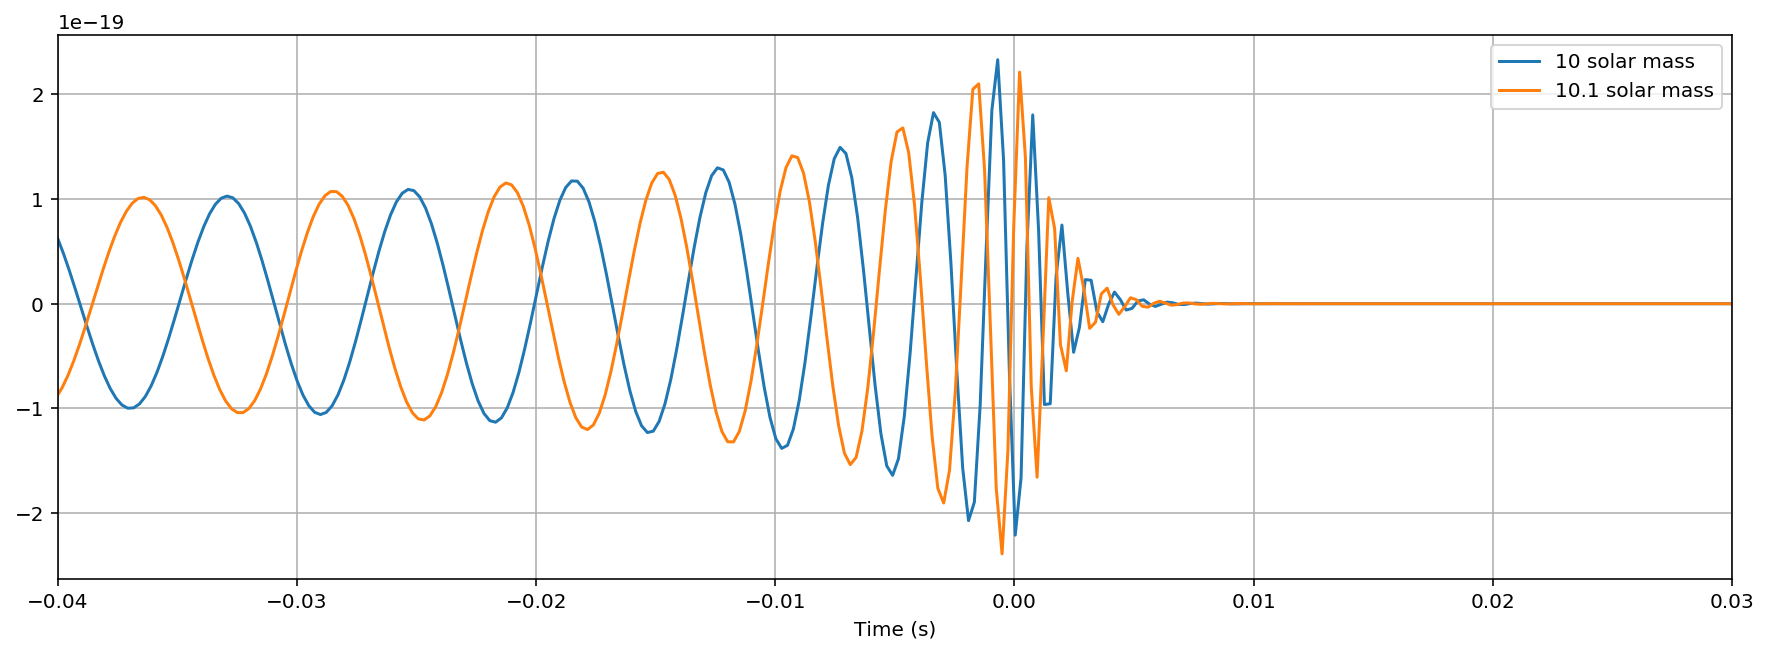

In [78]:
# Compare the time series for 10 solar mass and 10.1 solar mass BBHs
plt.figure(figsize=(15,5))
plt.plot(hp.sample_times, hp, label='10 solar mass')
plt.plot(hp2.sample_times, hp2, label='10.1 solar mass')
plt.xlabel('Time (s)')
plt.legend()
plt.grid()

# Zooming in on merger
plt.figure(figsize=(15,5))
plt.plot(hp.sample_times, hp, label='10 solar mass')
plt.plot(hp2.sample_times, hp2, label='10.1 solar mass')
plt.xlabel('Time (s)')
plt.xlim(-0.04, 0.03)
plt.legend()
plt.grid()

In [79]:
# 10.1 solar mass merger to frequency series: 
hp2_f = hp2.to_frequencyseries()
hc2_f = hc2.to_frequencyseries()

# Resizing
hp2_f.resize(len(hp_f))
hc2_f.resize(len(hc_f))

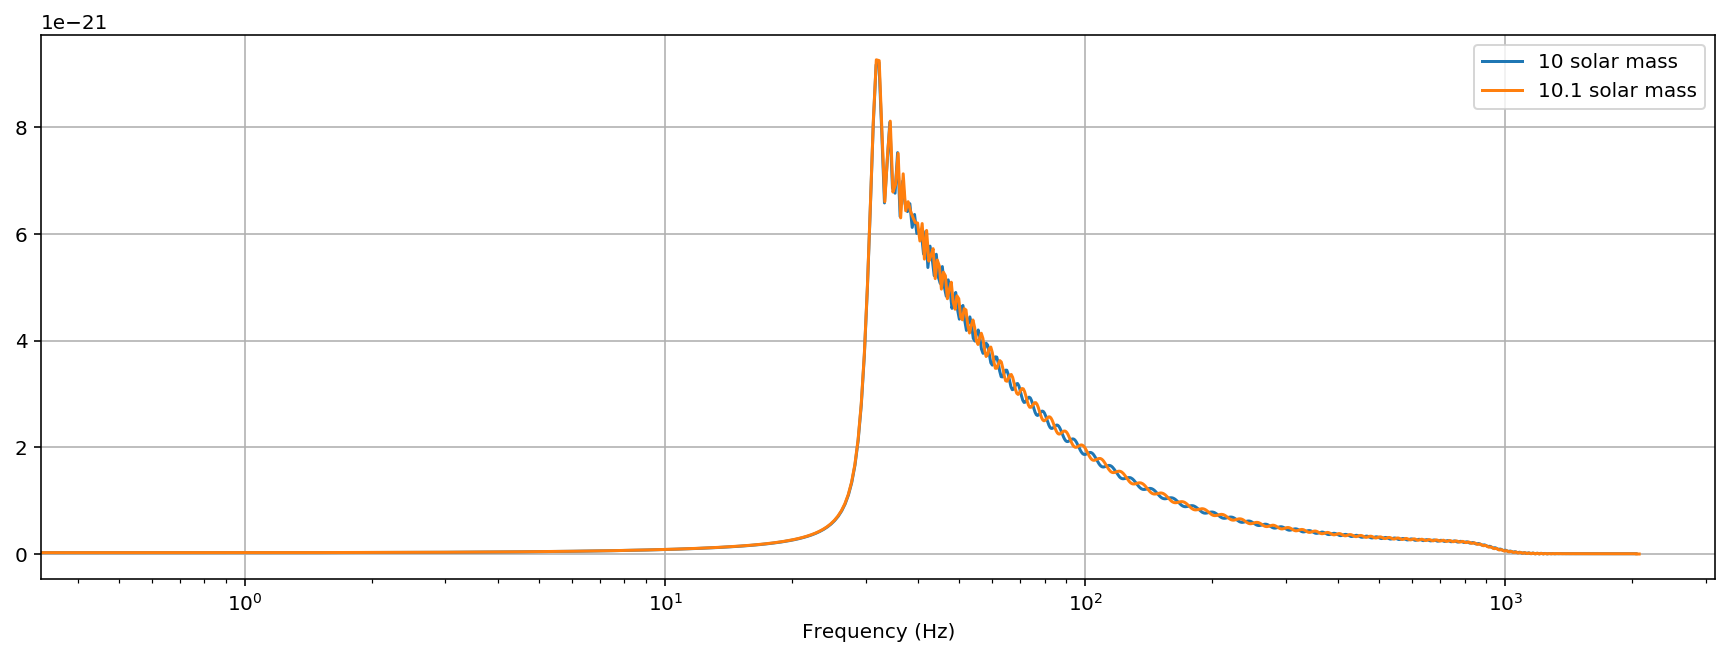

In [80]:
# Comparing to Frequency Series for 10 solar mass merger
plt.figure(figsize=(15,5))
plt.semilogx(hp_f.sample_frequencies, np.abs(hp_f), label='10 solar mass')
plt.semilogx(hp2_f.sample_frequencies, np.abs(hp2_f), label='10.1 solar mass')
plt.xlabel('Frequency (Hz)')
plt.legend()
plt.grid()

## Phase Accumulation

To get the phase, calculate the complex strain and extract the phase:

$$ h_{complex} = h_+\,+\,i\,h_{\times} \sim A\,e^{i\,\varphi}$$

In [81]:
# Arrays for complex strains:
h_complex = []    # For 10 solar mass BBH
h_complex_2 = []  # For 10.1 solar mass BBH

for i in range(0,len(hp)):
    h_comp = complex(hp[i],hc[i])
    h_complex.append(h_comp)

for i in range(0,len(hp2)):
    h_comp_2 = complex(hp2[i], hc2[i])
    h_complex_2.append(h_comp_2)

    
# Extract phase: 
phase_arr = []
phase_arr_2 = []

for h_comp in h_complex:     
    phase = np.angle(h_comp)  
    phase_arr.append(phase)
    
for h_comp_2 in h_complex_2:
    phase2 = np.angle(h_comp_2)
    phase_arr_2.append(phase2)
  
# Accumulated phase arrays:
accum_phase_arr = np.unwrap(phase_arr)
accum_phase_arr_2 = np.unwrap(phase_arr_2)

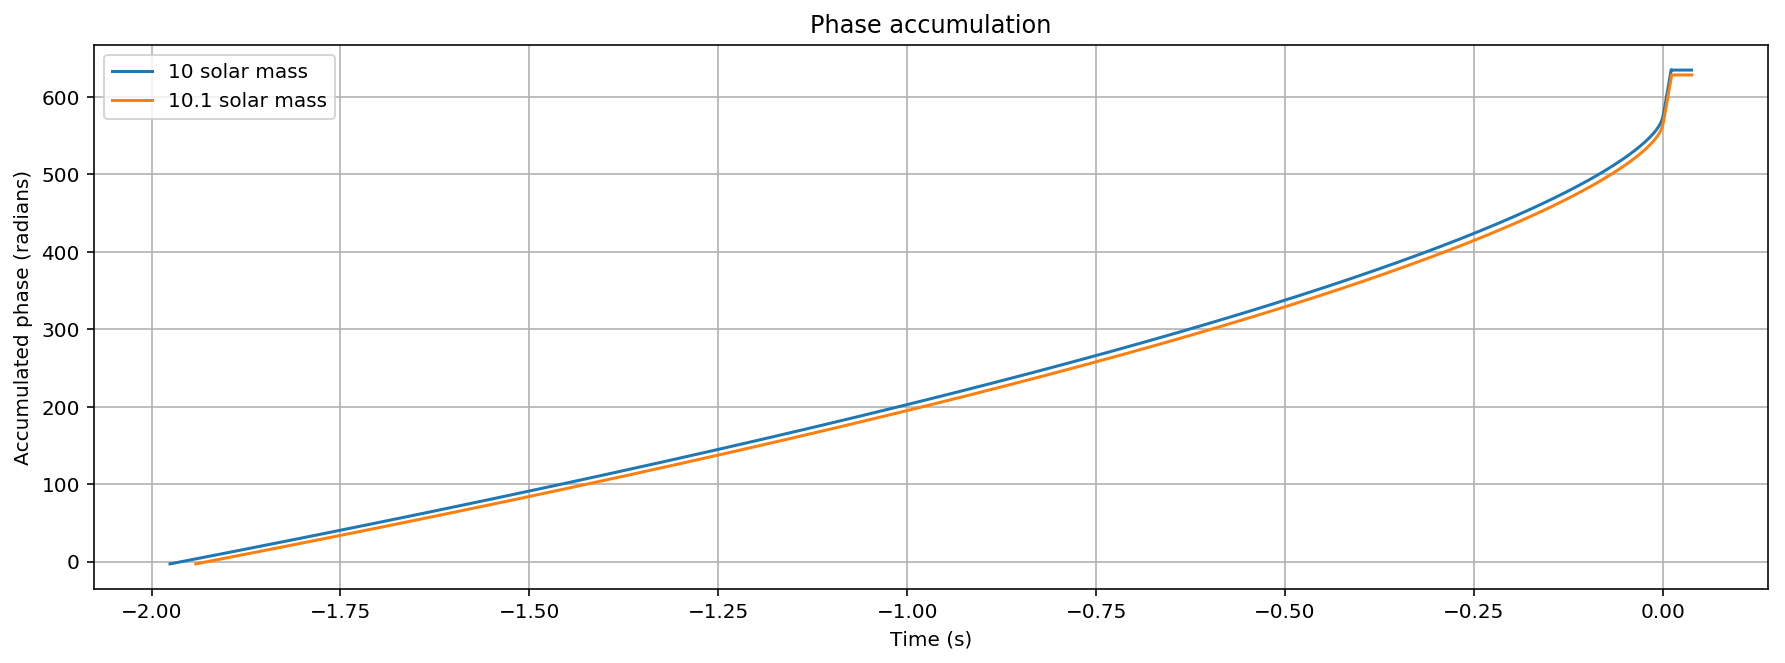

In [82]:
# Plotting phase accumulation: 

plt.figure(figsize=(15,5))
plt.plot(hp.sample_times, accum_phase_arr, label='10 solar mass')
plt.plot(hp2.sample_times, accum_phase_arr_2, label='10.1 solar mass')
plt.xlabel("Time (s)")
plt.ylabel("Accumulated phase (radians)")
plt.title("Phase accumulation")
plt.grid()
plt.legend()

In [83]:
# Array for phase difference

accum_phase_arr_trimmed = accum_phase_arr[8248-8110:]

phase_diff = accum_phase_arr_trimmed - accum_phase_arr_2

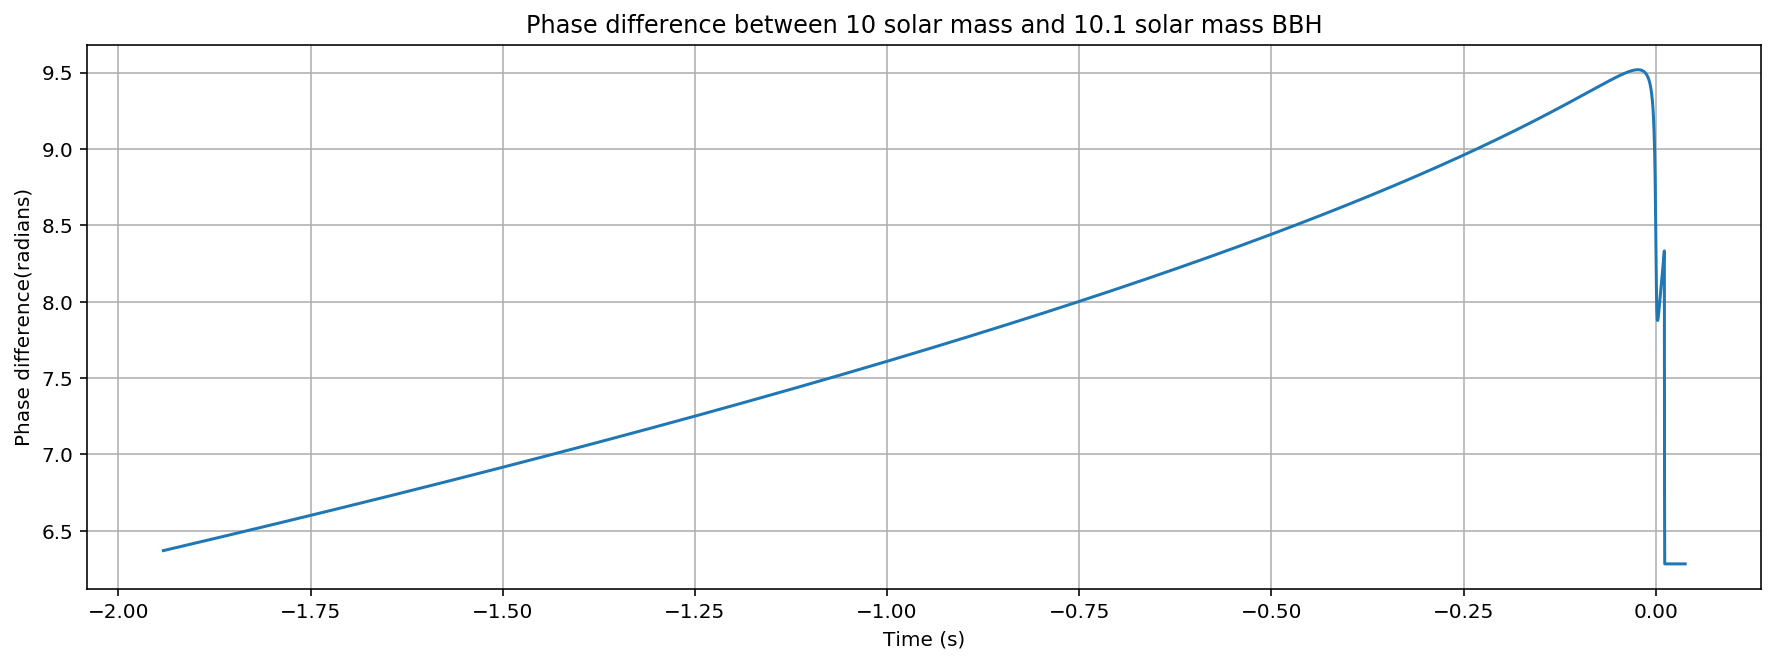

In [84]:
# Plotting phase difference array

plt.figure(figsize=(15,5))
plt.plot(hp2.sample_times, phase_diff)
plt.xlabel("Time (s)")
plt.ylabel("Phase difference(radians)")
plt.title("Phase difference between 10 solar mass and 10.1 solar mass BBH")
plt.grid()

In [122]:
# Now, in frequency domain (just h+)
    
phasef_arr = []    # For 10 solar mass BBH
phasef_arr_2 = []  # For 10.1 solar mass BBH

for h in hp_f:     
    phase = np.angle(h)  
    phasef_arr.append(phase)
    
for h2 in hp2_f:
    phase2 = np.angle(h2)
    phasef_arr_2.append(phase2)
  
# Accumulated phase arrays:
accum_phasef_arr = np.unwrap(phasef_arr)
accum_phasef_arr_2 = np.unwrap(phasef_arr_2)

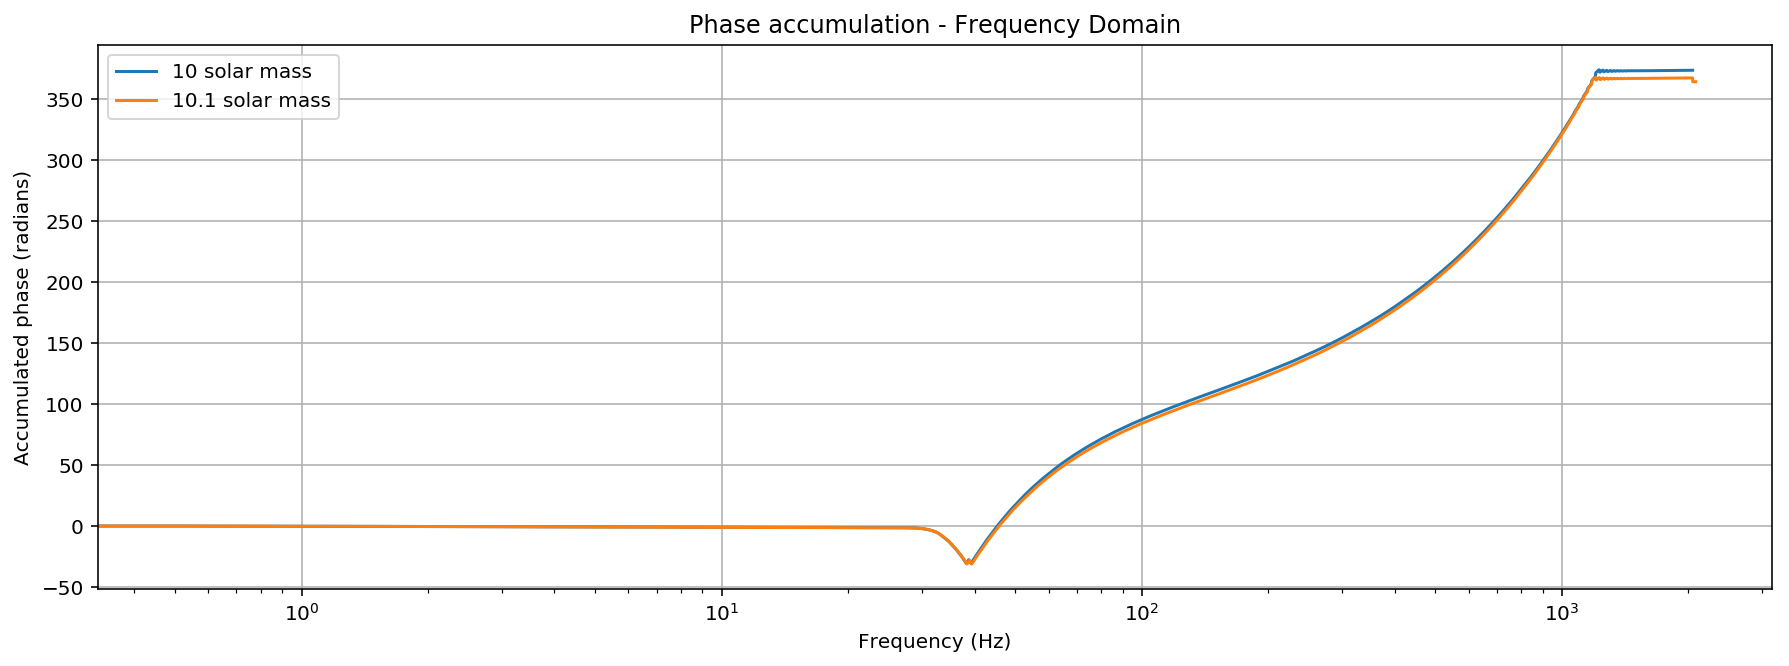

In [123]:
# Plotting h+ phase accumulation in frequency domain: 

plt.figure(figsize=(15,5))
plt.semilogx(hp_f.sample_frequencies, accum_phasef_arr, label='10 solar mass')
plt.semilogx(hp2_f.sample_frequencies, accum_phasef_arr_2, label='10.1 solar mass')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Accumulated phase (radians)")
plt.title("Phase accumulation - Frequency Domain")
plt.grid()
plt.legend()

In [124]:
print len(hp_f.sample_frequencies)
print len(hp2_f.sample_frequencies)

print hp_f.sample_frequencies
print hp2_f.sample_frequencies

4125
4125
[  0.00000000e+00   4.96605238e-01   9.93210475e-01 ...,   2.04700679e+03
   2.04750339e+03   2.04800000e+03]
[  0.00000000e+00   5.05055487e-01   1.01011097e+00 ...,   2.08183872e+03
   2.08234377e+03   2.08284883e+03]


In [127]:
# Array for phase difference in freq. domain

phasef_diff = accum_phasef_arr - accum_phasef_arr_2

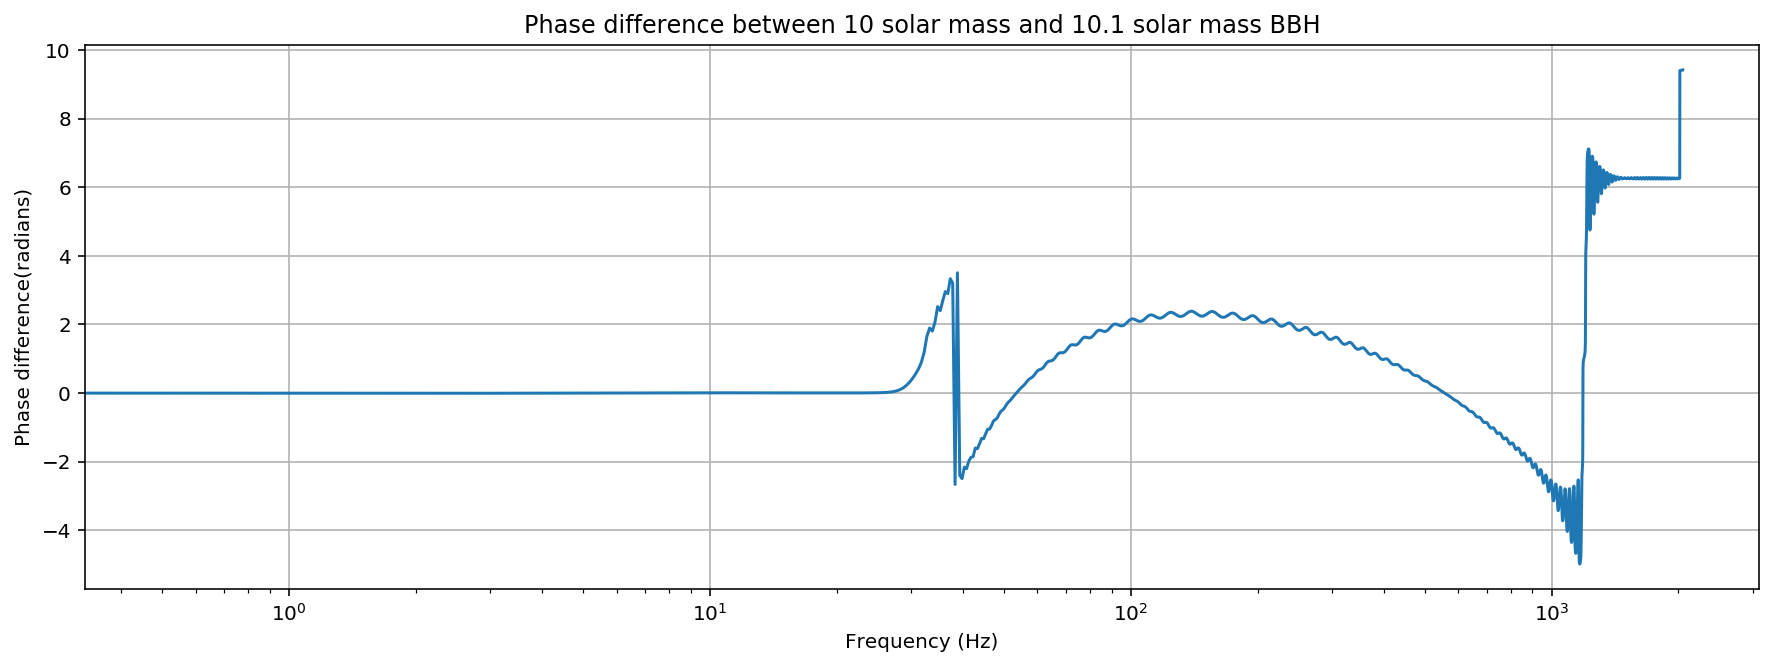

In [128]:
# Plotting phase difference array in freq. domain

plt.figure(figsize=(15,5))
plt.semilogx(hp_f.sample_frequencies, phasef_diff)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase difference(radians)")
plt.title("Phase difference between 10 solar mass and 10.1 solar mass BBH")
plt.grid()

# Same exercise but varying eccentricity instead of mass

In [90]:
# Plus and cross polarizations from eccentric waveform in time domain

# Eccentricity of 0.000001 (hopefully negligible)
hpe1, hce1 = get_td_waveform(approximant="EccentricTD",
                         mass1=10,
                         mass2=10,
                         delta_t=1.0/8192,
                         eccentricity=0.000001,
                         f_lower=30)

# Eccentricity of 0.1 (not negligible)
hpe2, hce2 = get_td_waveform(approximant="EccentricTD",
                         mass1=10,
                         mass2=10,
                         delta_t=1.0/8192,
                         eccentricity=0.1,
                         f_lower=30)

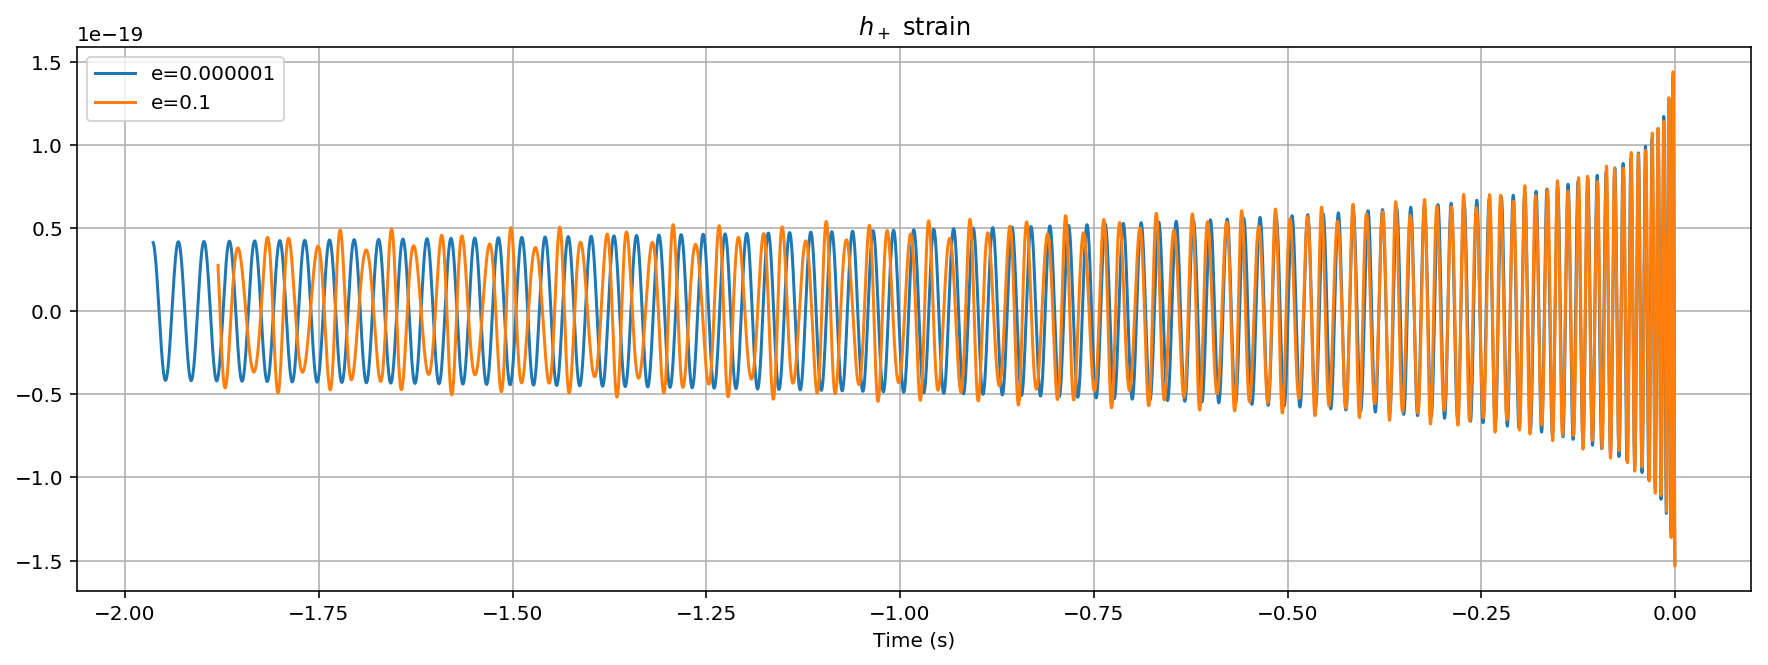

In [91]:
plt.figure(figsize=(15,5))
plt.plot(hpe1.sample_times, hpe1, label='e=0.000001')
plt.plot(hpe2.sample_times, hpe2, label='e=0.1')
plt.xlabel('Time (s)')
plt.title('$h_+$ strain')
plt.legend()
plt.grid()

In [92]:
# Arrays for complex strains:
he1_complex = []    # For e=0.000001 BBH
he2_complex = []  # For e=0.1 BBH

for i in range(0,len(hpe1)):
    h_comp = complex(hpe1[i],hce1[i])
    he1_complex.append(h_comp)

for i in range(0,len(hpe2)):
    h_comp_2 = complex(hpe2[i], hce2[i])
    he2_complex.append(h_comp_2)
    
#print len(he1_complex)
#print len(he2_complex)

    
# Extract phase: 
e1_phase_arr = []
e2_phase_arr = []

for h_comp in he1_complex:     
    phase = np.angle(h_comp)  
    e1_phase_arr.append(phase)
    
for h_comp_2 in he2_complex:
    phase2 = np.angle(h_comp_2)
    e2_phase_arr.append(phase2)

#print len(e1_phase_arr)
#print len(e2_phase_arr)


# Accumulated phase: 
e1_accum_phase_arr = np.unwrap(e1_phase_arr)
e2_accum_phase_arr = np.unwrap(e2_phase_arr)

print len(e1_accum_phase_arr)
print len(e2_accum_phase_arr)

16087
15401


(-1, 0)

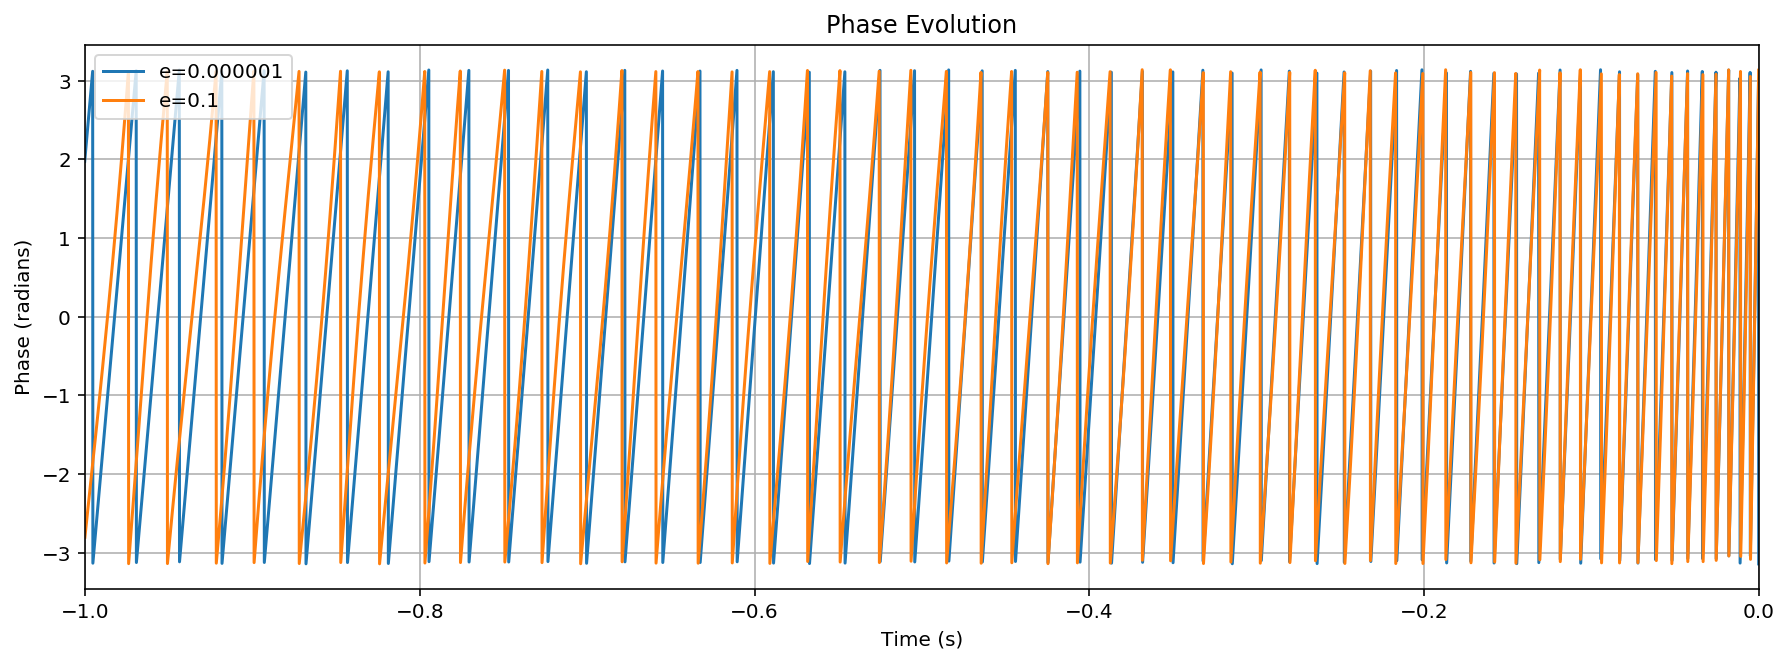

In [119]:
# Plotting phase evolution 

plt.figure(figsize=(15,5))
plt.plot(hpe1.sample_times, e1_phase_arr, label='e=0.000001')
plt.plot(hpe2.sample_times, e2_phase_arr, label='e=0.1')
plt.xlabel("Time (s)")
plt.ylabel("Phase (radians)")
plt.title("Phase Evolution")
plt.grid()
plt.legend()
plt.xlim(-1,0)

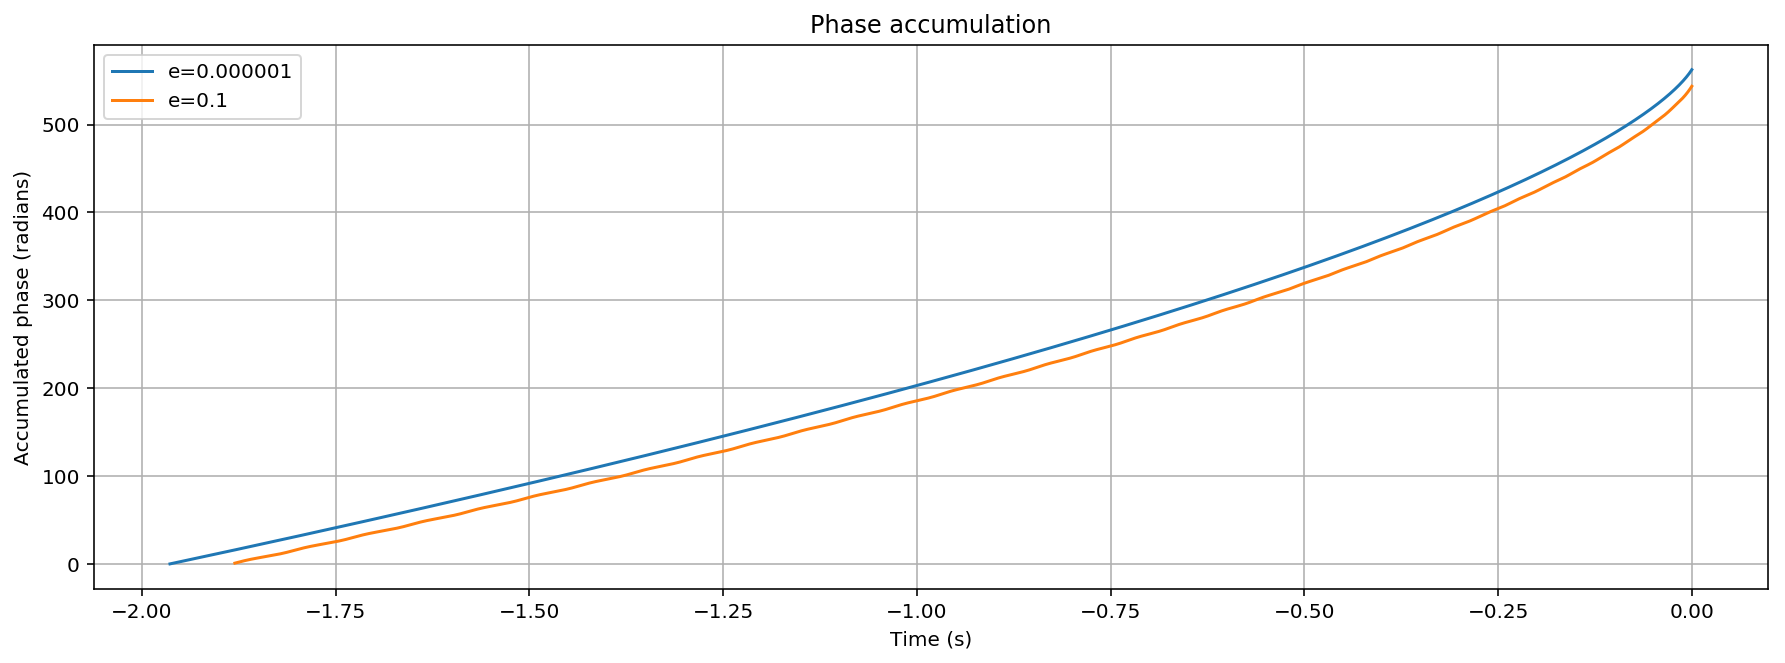

In [93]:
# Plotting phase accumulation 

plt.figure(figsize=(15,5))
plt.plot(hpe1.sample_times, e1_accum_phase_arr, label='e=0.000001')
plt.plot(hpe2.sample_times, e2_accum_phase_arr, label='e=0.1')
plt.xlabel("Time (s)")
plt.ylabel("Accumulated phase (radians)")
plt.title("Phase accumulation")
plt.grid()
plt.legend()

In [94]:
# Array for phase difference

e1_accum_phase_arr_trimmed = e1_accum_phase_arr[16087-15401:]

e_phase_diff = e1_accum_phase_arr_trimmed - e2_accum_phase_arr

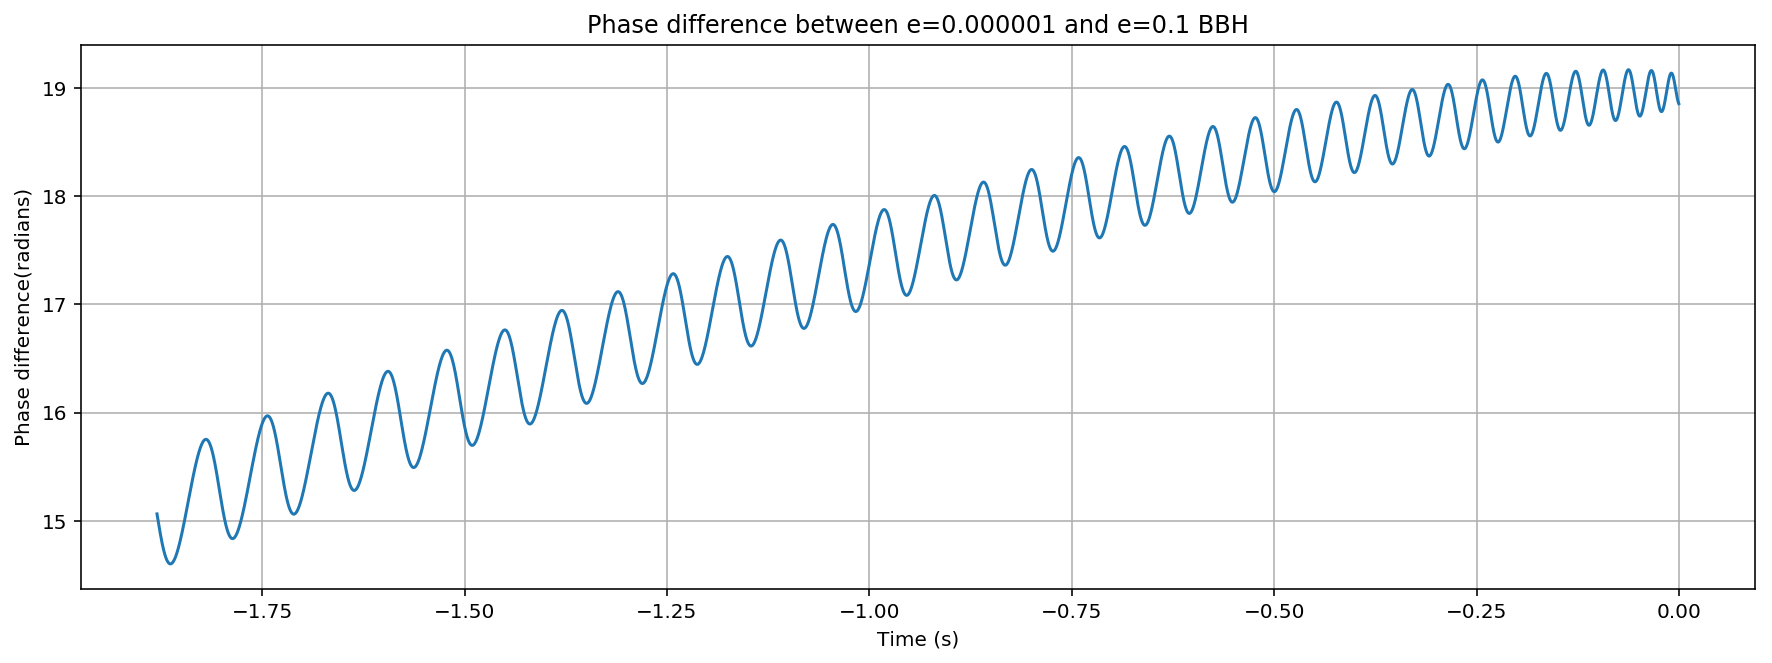

In [95]:
# Plotting phase difference 

plt.figure(figsize=(15,5))
plt.plot(hpe2.sample_times, e_phase_diff)
plt.xlabel("Time (s)")
plt.ylabel("Phase difference(radians)")
plt.title("Phase difference between e=0.000001 and e=0.1 BBH")
plt.grid()

In [96]:
# And now in frequency domain ... 

# Eccentricity of 0.000001 
hpfe1, hcfe1 = get_fd_waveform(approximant="EccentricFD",
                         mass1=10,
                         mass2=10,
                         delta_t=1.0/8192,
                         eccentricity=0.000001,
                         delta_f=0.001,
                         f_lower=30)

# Eccentricity of 0.1 
hpfe2, hcfe2 = get_fd_waveform(approximant="EccentricFD",
                         mass1=10,
                         mass2=10,
                         delta_t=1.0/8192,
                         eccentricity=0.1,
                         delta_f=0.001,
                         f_lower=30)

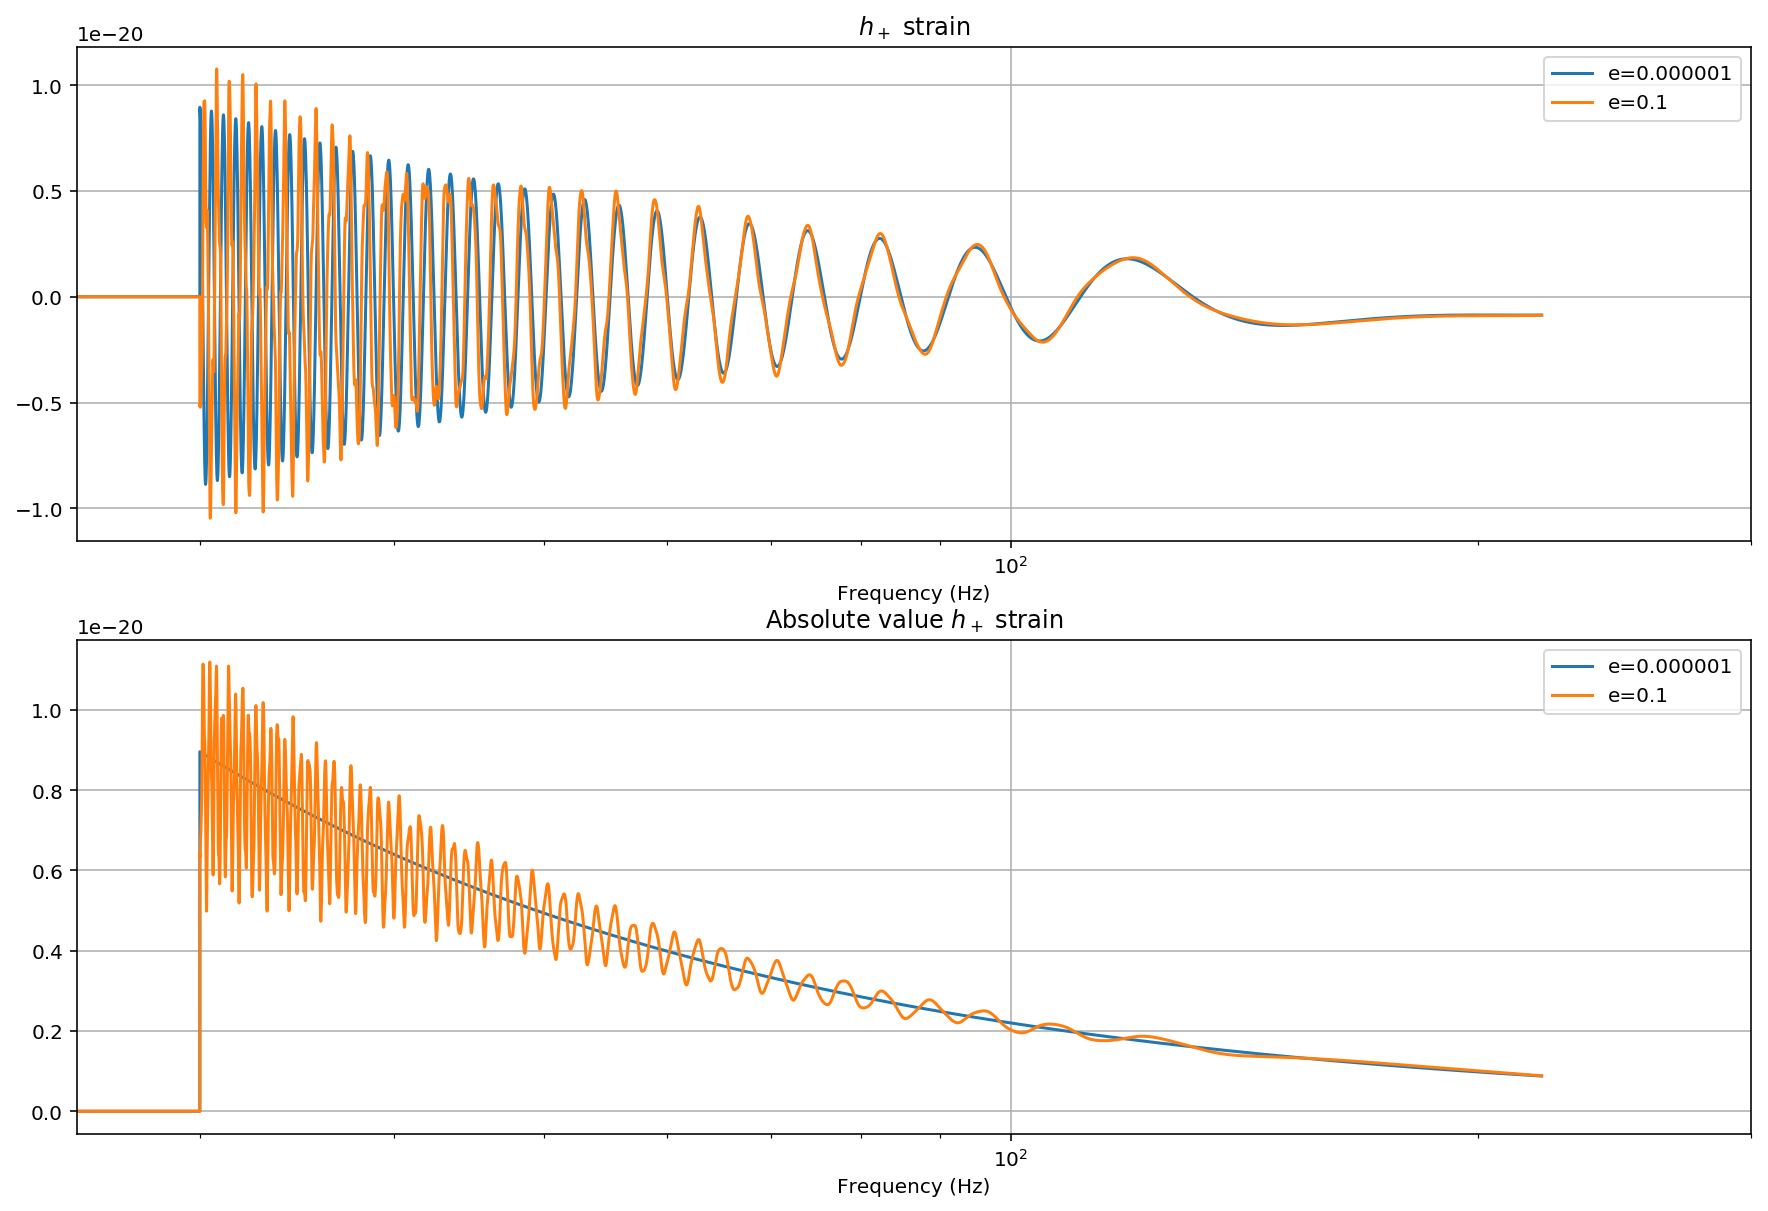

In [97]:
plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
plt.semilogx(hpfe1.sample_frequencies, hpfe1, label='e=0.000001')
plt.semilogx(hpfe2.sample_frequencies, hpfe2, label='e=0.1')
plt.xlabel('Frequency (Hz)')
plt.title('$h_+$ strain')
plt.xlim(25,300)
plt.legend()
plt.grid()

plt.subplot(2,1,2)
plt.semilogx(hpfe1.sample_frequencies, np.abs(hpfe1), label='e=0.000001')
plt.semilogx(hpfe2.sample_frequencies, np.abs(hpfe2), label='e=0.1')
plt.xlabel('Frequency (Hz)')
plt.title('Absolute value $h_+$ strain')
plt.xlim(25,300)
plt.legend()
plt.grid()

In [129]:
# Extract phase (just h+): 
fe1_phase_arr = []  # e = 0.000001
fe2_phase_arr = []  # e = 0.1

for h in hpfe1:     
    phase = np.angle(h)  
    fe1_phase_arr.append(phase)
    
for h2 in hpfe2:
    phase2 = np.angle(h2)
    fe2_phase_arr.append(phase2)

#print len(fe1_phase_arr)
#print len(fe2_phase_arr)


# Accumulated phase: 
fe1_accum_phase_arr = np.unwrap(fe1_phase_arr)
fe2_accum_phase_arr = np.unwrap(fe2_phase_arr)

print len(fe1_accum_phase_arr)
print len(fe2_accum_phase_arr)

219859
219859


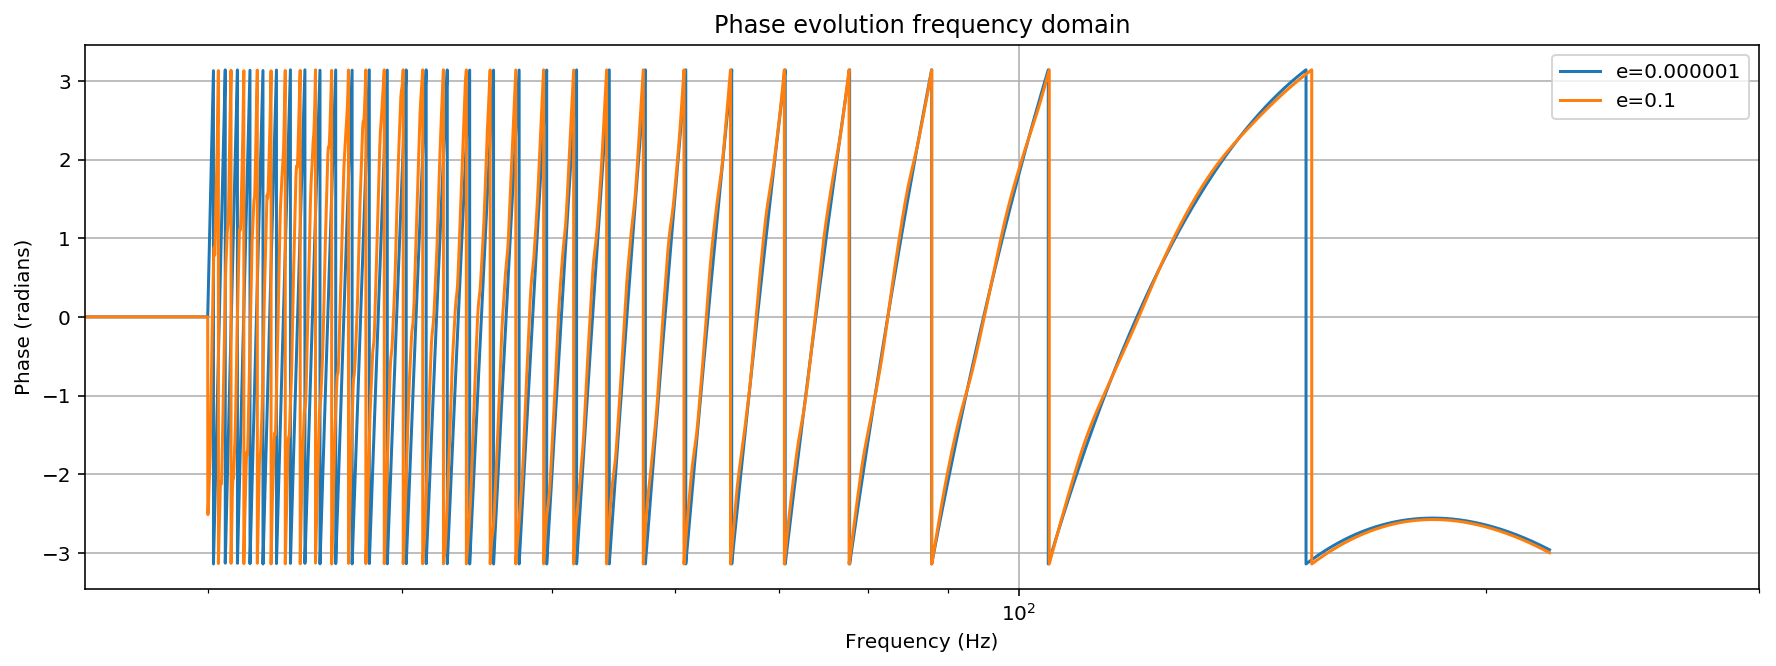

In [130]:
# Plotting non-accumulated phase in freq. domain 

plt.figure(figsize=(15,5))
plt.semilogx(hpfe1.sample_frequencies, fe1_phase_arr, label='e=0.000001')
plt.semilogx(hpfe2.sample_frequencies, fe2_phase_arr, label='e=0.1')
plt.xlabel('Frequency (Hz)')
plt.ylabel("Phase (radians)")
plt.title("Phase evolution frequency domain")
plt.xlim(25,300)
plt.legend()
plt.grid()

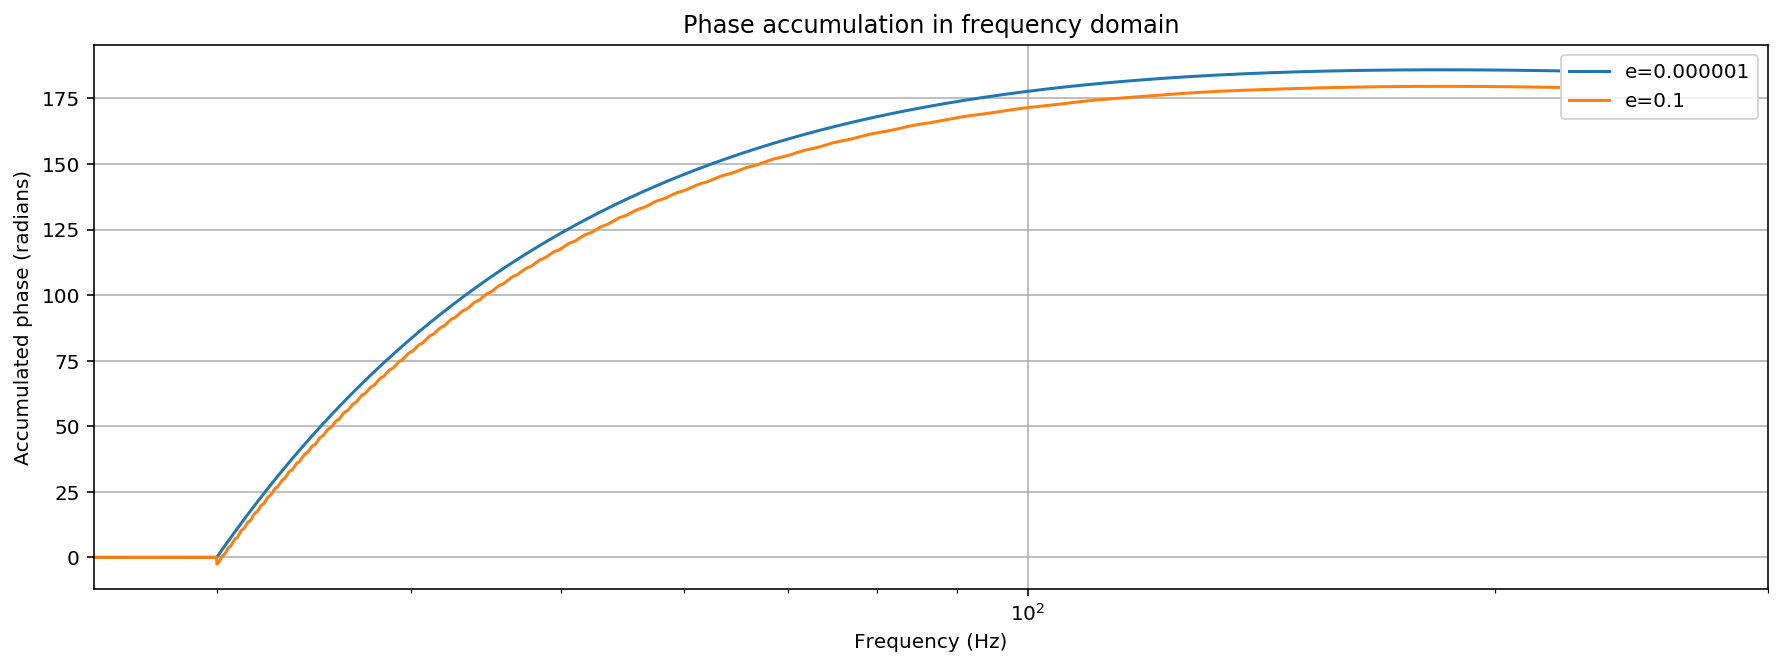

In [131]:
# Plotting phase accumulation in freq. domain 

plt.figure(figsize=(15,5))
plt.semilogx(hpfe1.sample_frequencies, fe1_accum_phase_arr, label='e=0.000001')
plt.semilogx(hpfe2.sample_frequencies, fe2_accum_phase_arr, label='e=0.1')
plt.xlabel('Frequency (Hz)')
plt.ylabel("Accumulated phase (radians)")
plt.title("Phase accumulation in frequency domain")
plt.xlim(25,300)
plt.legend()
plt.grid()

In [132]:
# Array for phase diff in freq. domain

fe_phase_diff = fe1_accum_phase_arr - fe2_accum_phase_arr

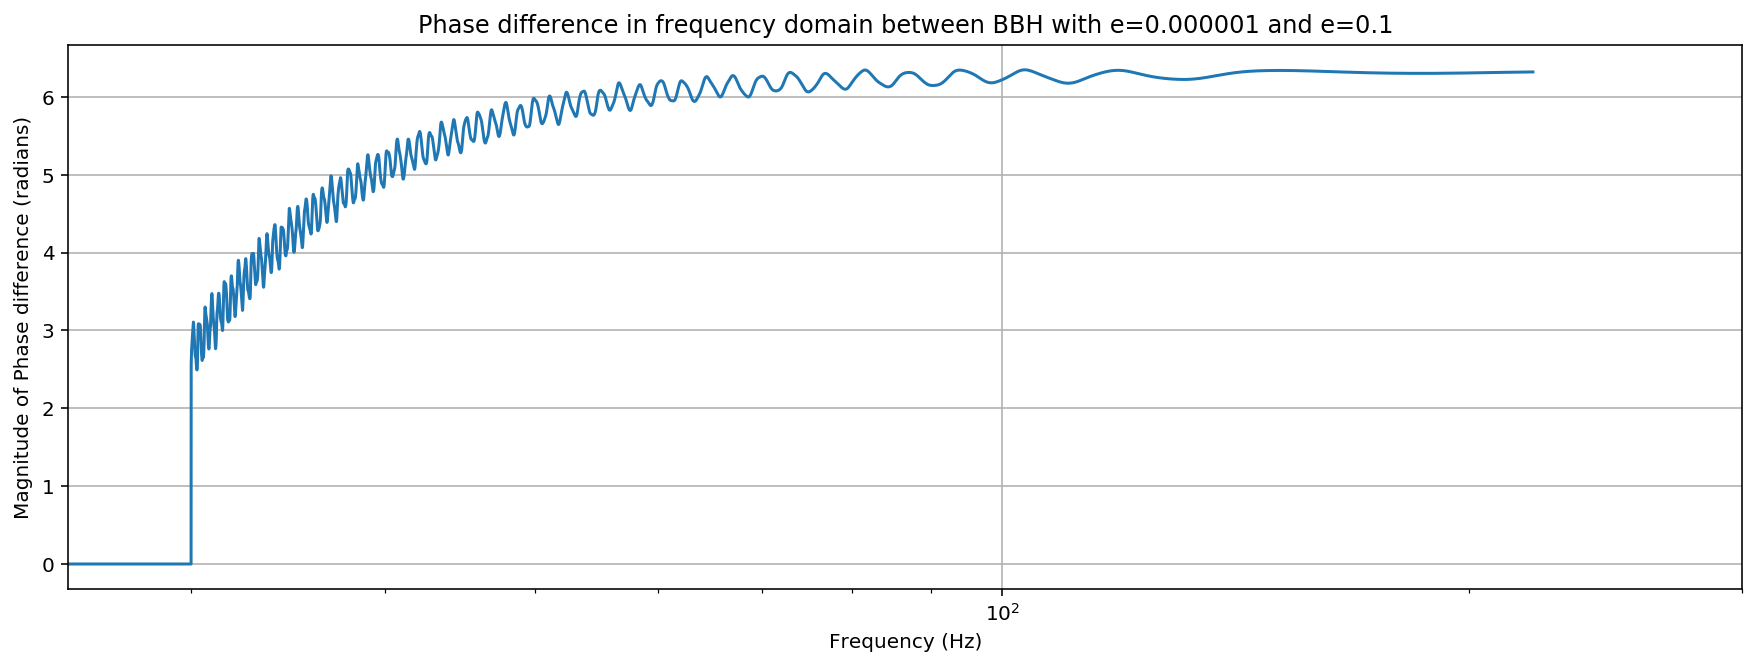

In [133]:
# Plotting phase diff in freq. domain 

plt.figure(figsize=(15,5))
plt.semilogx(hpfe1.sample_frequencies, np.abs(fe_phase_diff))
plt.xlabel('Frequency (Hz)')
plt.ylabel("Magnitude of Phase difference (radians)")
plt.title("Phase difference in frequency domain between BBH with e=0.000001 and e=0.1")
plt.xlim(25,300)
plt.grid()